In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sc
import seaborn as sns

In [2]:
pd.set_option('max_rows', 100)

Taking into account the need of the mayor of Bucaramanga to warn about risk situations and promote comprehensive humanitarian prevention of the state for various populations at risk, we will work with the crime dataset that comes from the police database where the crimes were recorded by municipality delimited from 2010 to 2022.

In [3]:
delitos = pd.read_csv("/Users/giovannydelacruz/Dropbox/Programación y Certificaciones/DS4A/Proyecto/Data/delitos_policia_consolidado.csv", low_memory=False)

In [4]:
delitos.head()

,Unnamed: 0,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,AGRUPA EDAD PERSONA,CANTIDAD,TIPO DELITO,DESCRIPCION CONDUCTA
0,0,HUILA,CAMPOALEGRE,41132000,NO REPORTADO,2010-01-01,FEMENINO,ADULTOS,1.0,albigeato,NaN
1,1,META,SAN JUAN DE ARAMA,50683000,NO REPORTADO,2010-01-01,MASCULINO,ADULTOS,1.0,albigeato,NaN
2,2,BOYACÁ,BELÉN,15087000,NO REPORTADO,2010-01-02,FEMENINO,ADULTOS,1.0,albigeato,NaN
3,3,CASANARE,PORE,85263000,NO REPORTADO,2010-01-02,MASCULINO,ADULTOS,1.0,albigeato,NaN
4,4,CALDAS,NEIRA,17486000,NO REPORTADO,2010-01-03,MASCULINO,ADULTOS,1.0,albigeato,NaN


In [5]:
delitos.shape

(4496106, 11)

We have a dataset with 4.496.106 records.

In [6]:
delitos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4496106 entries, 0 to 4496105
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   DEPARTAMENTO          object 
 2   MUNICIPIO             object 
 3   CODIGO DANE           object 
 4   ARMAS MEDIOS          object 
 5   FECHA HECHO           object 
 6   GENERO                object 
 7   AGRUPA EDAD PERSONA   object 
 8   CANTIDAD              float64
 9   TIPO DELITO           object 
 10  DESCRIPCION CONDUCTA  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 377.3+ MB


Reviewing the dataset, we have an integer type variable, a float type variable and 9 object type variables.

As part of the dataset treatment and in order to leave only the columns that are of interest for the investigation, the CODIGO DANE column will be eliminated, since we already have the way to identify the municipality from the MUNICIPIO column. The DESCRIPCION CONDUCTA column will be eliminated since it is a more detailed explanation of the crime but we can already classify it within the TIPO DELITO column. Finally, the column Unnamed: 0 will be eliminated, since it only represents the index of the rows.

In [7]:
delitos = delitos.drop(columns=["Unnamed: 0","CODIGO DANE","DESCRIPCION CONDUCTA"])

In [8]:
delitos.isna().sum()[delitos.isna().sum() > 0]

MUNICIPIO                   2
ARMAS MEDIOS           371818
GENERO                 540670
AGRUPA EDAD PERSONA    550768
dtype: int64

As we can see, the dataset contains several null values, for which we will review how to treat them according to the information we have.

**MUNICIPIO:**

In [9]:
delitos["MUNICIPIO"].sort_values().drop_duplicates().tolist()

['-',
 'ABEJORRAL',
 'ABREGO',
 'ABRIAQUÍ',
 'ACACÍAS',
 'ACANDÍ',
 'ACEVEDO',
 'ACHÍ',
 'AGRADO',
 'AGUA DE DIOS',
 'AGUACHICA',
 'AGUADA',
 'AGUADAS',
 'AGUAZUL',
 'AGUSTÍN CODAZZI',
 'AIPE',
 'ALBANIA',
 'ALBÁN',
 'ALCALÁ',
 'ALDANA',
 'ALEJANDRÍA',
 'ALGARROBO',
 'ALGECIRAS',
 'ALMAGUER',
 'ALMEIDA',
 'ALPUJARRA',
 'ALTAMIRA',
 'ALTO BAUDÓ',
 'ALTOS DEL ROSARIO',
 'ALVARADO',
 'AMAGÁ',
 'AMALFI',
 'AMBALEMA',
 'ANAPOIMA',
 'ANCUYÁ',
 'ANDALUCÍA',
 'ANDES',
 'ANGELÓPOLIS',
 'ANGOSTURA',
 'ANOLAIMA',
 'ANORÍ',
 'ANSERMA',
 'ANSERMANUEVO',
 'ANZA',
 'ANZOÁTEGUI',
 'APARTADÓ',
 'APULO',
 'APÍA',
 'AQUITANIA',
 'ARACATACA',
 'ARANZAZU',
 'ARATOCA',
 'ARAUCA (CT)',
 'ARAUQUITA',
 'ARBELÁEZ',
 'ARBOLEDA',
 'ARBOLEDAS',
 'ARBOLETES',
 'ARCABUCO',
 'ARENAL',
 'ARGELIA',
 'ARIGUANÍ',
 'ARJONA',
 'ARMENIA',
 'ARMENIA (CT)',
 'ARMERO',
 'ARROYOHONDO',
 'ASTREA',
 'ATACO',
 'ATRATO',
 'AYAPEL',
 'BAGADÓ',
 'BAHÍA SOLANO',
 'BAJO BAUDÓ',
 'BALBOA',
 'BARANOA',
 'BARAYA',
 'BARBACOAS',
 'BARBOSA'

In [10]:
delitos["MUNICIPIO"] = delitos["MUNICIPIO"].str.replace("-","NO REGISTRA")

In [11]:
delitos["MUNICIPIO"] = delitos["MUNICIPIO"].fillna("NO REGISTRA")

**ARMAS MEDIO:**

In [12]:
delitos["ARMAS MEDIOS"].sort_values().drop_duplicates().tolist()

['-',
 '11001000',
 '13001000',
 '13042000',
 '13052000',
 '13062000',
 '13074000',
 '13140000',
 '13160000',
 '13188000',
 '13212000',
 '13244000',
 '13430000',
 '13440000',
 '13442000',
 '13468000',
 '13549000',
 '13647000',
 '13654000',
 '13657000',
 '13667000',
 '13670000',
 '13673000',
 '13688000',
 '13744000',
 '13760000',
 '13780000',
 '13836000',
 '13873000',
 '13894000',
 '15001000',
 '15047000',
 '15087000',
 '15092000',
 '15097000',
 '15104000',
 '15114000',
 '15162000',
 '15176000',
 '15183000',
 '15189000',
 '15204000',
 '15215000',
 '15218000',
 '15236000',
 '15238000',
 '15244000',
 '15293000',
 '15299000',
 '15322000',
 '15325000',
 '15367000',
 '15401000',
 '15407000',
 '15425000',
 '15442000',
 '15455000',
 '15464000',
 '15466000',
 '15469000',
 '15476000',
 '15480000',
 '15491000',
 '15500000',
 '15507000',
 '15511000',
 '15516000',
 '15531000',
 '15533000',
 '15537000',
 '15572000',
 '15580000',
 '15599000',
 '15600000',
 '15632000',
 '15646000',
 '15664000',
 '1566

In [13]:
delitos["ARMAS MEDIOS"] = delitos["ARMAS MEDIOS"].fillna("NO REGISTRA")

In [14]:
delitos["ARMAS MEDIOS"] = delitos["ARMAS MEDIOS"].replace(["-","NO REPORTADA","NO REPORTADA","NO REPORTADO","NO REPORTADO ","NO REPORTADOS","NO REPOTADO"],"NO REGISTRA")

**GENERO:**

In [15]:
delitos["GENERO"].sort_values().drop_duplicates().tolist()

['-',
 'FEMENINO',
 'MASCULINO',
 'NO REGISTRA',
 'NO REPORTA',
 'NO REPORTADO',
 nan]

In [16]:
delitos["GENERO"] = delitos["GENERO"].fillna("NO REGISTRA")

In [17]:
delitos["GENERO"] = delitos["GENERO"].replace(["-","NO REGISTRA","NO REPORTA","NO REPORTADO"],"NO REGISTRA")

**AGRUPA EDAD PERSONA:**

In [18]:
delitos["AGRUPA EDAD PERSONA"].sort_values().drop_duplicates().tolist()

[' ',
 'ADOLECENTES',
 'ADOLESCENTES',
 'ADULTOS',
 'MENORES',
 'NO REPORTA',
 'NO REPORTADO',
 nan]

In [19]:
delitos["AGRUPA EDAD PERSONA"] = delitos["AGRUPA EDAD PERSONA"].fillna("NO REGISTRA")

In [20]:
delitos["AGRUPA EDAD PERSONA"] = delitos["AGRUPA EDAD PERSONA"].replace([" ","NO REPORTA","NO REPORTADO"],"NO REGISTRA")

In [21]:
delitos["AGRUPA EDAD PERSONA"] = delitos["AGRUPA EDAD PERSONA"].replace("ADOLECENTES","ADOLESCENTES")

From now on we already have our database with the standard values.

In [22]:
delitos.head()

,DEPARTAMENTO,MUNICIPIO,ARMAS MEDIOS,FECHA HECHO,GENERO,AGRUPA EDAD PERSONA,CANTIDAD,TIPO DELITO
0,HUILA,CAMPOALEGRE,NO REGISTRA,2010-01-01,FEMENINO,ADULTOS,1.0,albigeato
1,META,SAN JUAN DE ARAMA,NO REGISTRA,2010-01-01,MASCULINO,ADULTOS,1.0,albigeato
2,BOYACÁ,BELÉN,NO REGISTRA,2010-01-02,FEMENINO,ADULTOS,1.0,albigeato
3,CASANARE,PORE,NO REGISTRA,2010-01-02,MASCULINO,ADULTOS,1.0,albigeato
4,CALDAS,NEIRA,NO REGISTRA,2010-01-03,MASCULINO,ADULTOS,1.0,albigeato


Finally and before starting with the visual exploration of the data, we will change the data type of the date and extract some important data. When doing this, we will find that some dates are not correct and will generate null values, however these are quite few, so we will not do any treatment.

In [23]:
delitos.groupby("FECHA HECHO").size().sort_values(ascending=False)

FECHA HECHO
2020-01-01             4383
2019-01-01             3545
2019-12-01             3051
2019-12-07             2989
2019-12-30             2964
                       ... 
2019-08-17 00:00:00       1
2019-08-16 00:00:00       1
2019-08-13 00:00:00       1
2019-08-09 00:00:00       1
2020-02-02 00:00:00       1
Length: 6529, dtype: int64

In [24]:
delitos["FECHA HECHO"] = pd.to_datetime(delitos["FECHA HECHO"], errors = 'coerce')

In [25]:
delitos["AÑO HECHO"] = delitos["FECHA HECHO"].dt.year

In [26]:
delitos["MES HECHO"] = delitos["FECHA HECHO"].dt.month

In [27]:
delitos["DIA HECHO"] = delitos["FECHA HECHO"].dt.day

In [28]:
delitos.groupby("MES HECHO").size()

MES HECHO
1.0     429108
2.0     380198
3.0     383618
4.0     342931
5.0     375735
6.0     360914
7.0     376580
8.0     382800
9.0     379893
10.0    379058
11.0    356907
12.0    347731
dtype: int64

In [29]:
delitos.groupby("AÑO HECHO").size()

AÑO HECHO
2010.0    181712
2011.0    203614
2012.0    241449
2013.0    251111
2014.0    264689
2015.0    309636
2016.0    344680
2017.0    419081
2018.0    439522
2019.0    845251
2020.0    590124
2021.0    377664
2022.0     26940
dtype: int64

In [30]:
delitos.groupby("DIA HECHO").size()

DIA HECHO
1.0     178979
2.0     149962
3.0     150587
4.0     150099
5.0     152592
6.0     148777
7.0     149571
8.0     150417
9.0     146054
10.0    151032
11.0    145742
12.0    148148
13.0    146041
14.0    145918
15.0    156959
16.0    148662
17.0    147578
18.0    147243
19.0    143504
20.0    148116
21.0    144506
22.0    144088
23.0    143331
24.0    141678
25.0    145467
26.0    139731
27.0    141420
28.0    144763
29.0    131516
30.0    130653
31.0     82339
dtype: int64

In [31]:
delitos.head(20)

,DEPARTAMENTO,MUNICIPIO,ARMAS MEDIOS,FECHA HECHO,GENERO,AGRUPA EDAD PERSONA,CANTIDAD,TIPO DELITO,AÑO HECHO,MES HECHO,DIA HECHO
0,HUILA,CAMPOALEGRE,NO REGISTRA,2010-01-01,FEMENINO,ADULTOS,1.0,albigeato,2010.0,1.0,1.0
1,META,SAN JUAN DE ARAMA,NO REGISTRA,2010-01-01,MASCULINO,ADULTOS,1.0,albigeato,2010.0,1.0,1.0
2,BOYACÁ,BELÉN,NO REGISTRA,2010-01-02,FEMENINO,ADULTOS,1.0,albigeato,2010.0,1.0,2.0
3,CASANARE,PORE,NO REGISTRA,2010-01-02,MASCULINO,ADULTOS,1.0,albigeato,2010.0,1.0,2.0
4,CALDAS,NEIRA,NO REGISTRA,2010-01-03,MASCULINO,ADULTOS,1.0,albigeato,2010.0,1.0,3.0
5,CAUCA,POPAYÁN (CT),NO REGISTRA,2010-01-03,MASCULINO,ADULTOS,1.0,albigeato,2010.0,1.0,3.0
6,META,SAN MARTÍN,NO REGISTRA,2010-01-03,MASCULINO,ADULTOS,1.0,albigeato,2010.0,1.0,3.0
7,ANTIOQUIA,CHIGORODÓ,NO REGISTRA,2010-01-04,MASCULINO,ADULTOS,1.0,albigeato,2010.0,1.0,4.0
8,META,SAN MARTÍN,NO REGISTRA,2010-01-04,FEMENINO,ADOLESCENTES,1.0,albigeato,2010.0,1.0,4.0
9,RISARALDA,PEREIRA (CT),NO REGISTRA,2010-01-04,MASCULINO,ADULTOS,1.0,albigeato,2010.0,1.0,4.0


After finishing the data processing, we only need to focus on the municipalities for which we are conducting the research, which are **BUCARAMANGA, FLORIDABLANCA, GIRON AND PIEDECUESTA**.

In [33]:
municipios_obj = ("BUCARAMANGA","FLORIDABLANCA","GIRÓN","PIEDECUESTA")

In [34]:
delitos_municipios_obj = delitos[delitos["MUNICIPIO"].str.contains('|'.join(municipios_obj))]

In [35]:
delitos_municipios_obj.shape

(174811, 11)

We can also see the description of the numerical values.

In [36]:
delitos_municipios_obj.describe()

,CANTIDAD,AÑO HECHO,MES HECHO,DIA HECHO
count,174811.000000,174811.000000,174811.000000,174811.000000
mean,1.407062,2016.159698,6.477899,15.561853
std,1.009306,3.408440,3.448613,8.825927
min,1.000000,2010.000000,1.000000,1.000000
25%,1.000000,2013.000000,3.000000,8.000000
50%,1.000000,2017.000000,7.000000,15.000000
75%,1.000000,2019.000000,9.000000,23.000000
max,29.000000,2022.000000,12.000000,31.000000


From the previous table we can see that we have 174,811 records and that the average number of people involved in the crimes is 1.4 people and at most we have records with 29 people involved.

**DATA VISUALIZATION**

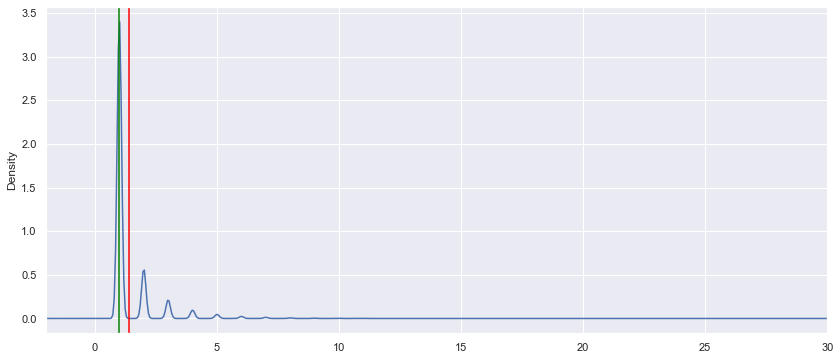

In [51]:
ax = delitos_municipios_obj["CANTIDAD"].plot(kind="density", figsize=(14,6), xlim =(-2,30))
ax.axvline(delitos_municipios_obj["CANTIDAD"].mean(), color ="red")
ax.axvline(delitos_municipios_obj["CANTIDAD"].median(), color ="green")


From the construction of a density plot for the QUANTITY variable we can see that it is skewed to right, where we see that the mean is greater than the median.

<AxesSubplot:title={'center':'Number of crimes by date'}, xlabel='Fecha Hecho', ylabel='Daily total crimes'>

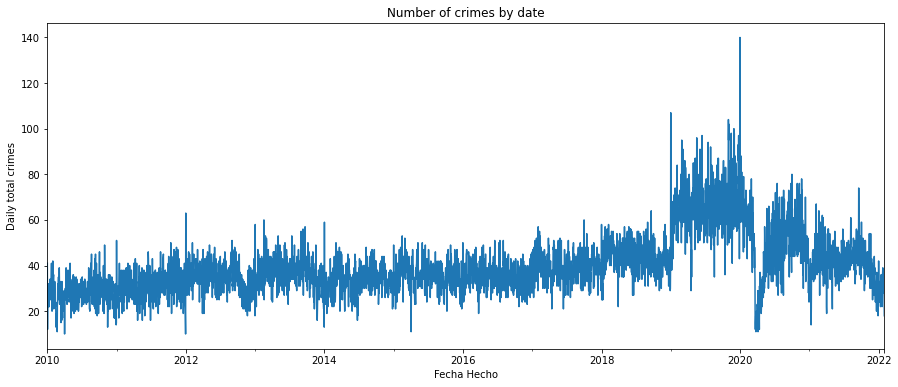

In [38]:
delitos_municipios_obj.groupby("FECHA HECHO").size().plot(title="Number of crimes by date", figsize =(15,6), xlabel = "Fecha Hecho", ylabel = "Daily total crimes")

If we analyze the crimes by date we can see that from 2010 to 2018 there is a very similar daily crime with some peaks but on average similar. However, it is evident that in 2019 there was an increase in daily crime and also at the beginning of 2020 there was a drop in daily crime.

<AxesSubplot:title={'center':'Crimes group by Gender'}, ylabel=' GENDER'>

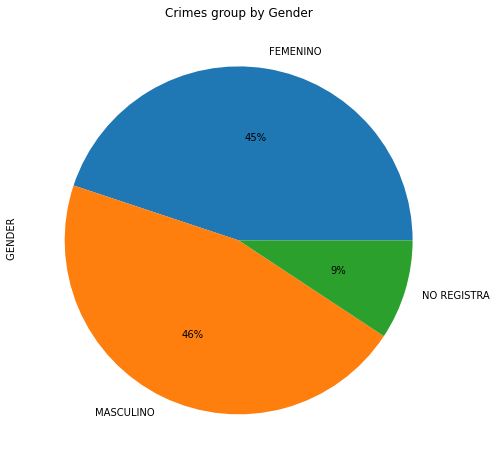

In [39]:
delitos_municipios_obj.groupby("GENERO").size().plot(kind="pie",figsize=(10,8),autopct='%.0f%%', title = "Crimes group by Gender", ylabel =" GENDER")

When reviewing the crimes by gender, it can be seen that the crimes are widely distributed, taking into account that gender is taken as participation in the crimes.

<AxesSubplot:title={'center':'Crimes group by Edad Persona'}>

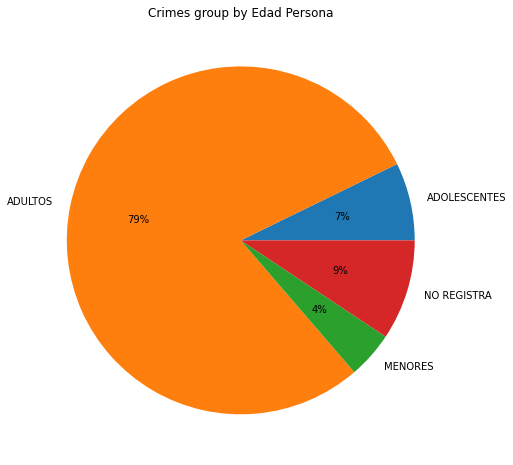

In [40]:
delitos_municipios_obj.groupby("AGRUPA EDAD PERSONA").size().plot(kind="pie",figsize=(10,8),autopct='%.0f%%', title ="Crimes group by Edad Persona", ylabel = "")

Contrary to the graph by gender, the graph by age group shows a majority in the participation of adults with approximately 80%. However, it also highlights that 11% of crimes involve adolescents and minors.

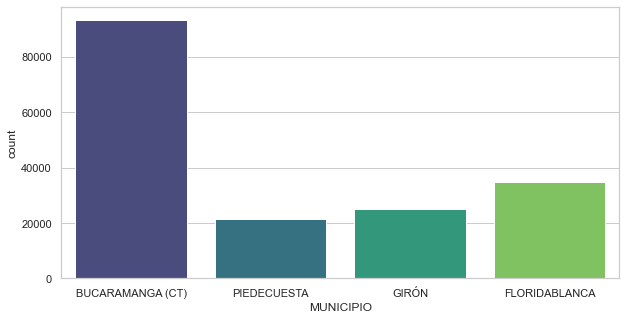

In [41]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(x ="MUNICIPIO", data = delitos_municipios_obj, palette="viridis")

When reviewing the crimes by municipality within the target group of the investigation, it can be seen that Bucaramanga is the city with the most crimes, even more than the sum of the other three municipalities. This could also occur taking into account that the population of Bucaramanga is greater than that of the other three, so it would be important to see the number of crimes / the population, however in our database we do not have this information and therefore We will not review this point for the time being.

In [42]:
delitos_municipios_obj["ARMAS MEDIOS"] = delitos_municipios_obj["ARMAS MEDIOS"].replace(["68001000","68276000","68547000","68307000"],"NO REGISTRA")

/var/folders/s2/7zt_5m2d2nv76vq_ybqf9csm0000gn/T/ipykernel_1689/1423572980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delitos_municipios_obj["ARMAS MEDIOS"] = delitos_municipios_obj["ARMAS MEDIOS"].replace(["68001000","68276000","68547000","68307000"],"NO REGISTRA")


[Text(0.5, 1.0, 'Type of Weapon used in crime')]

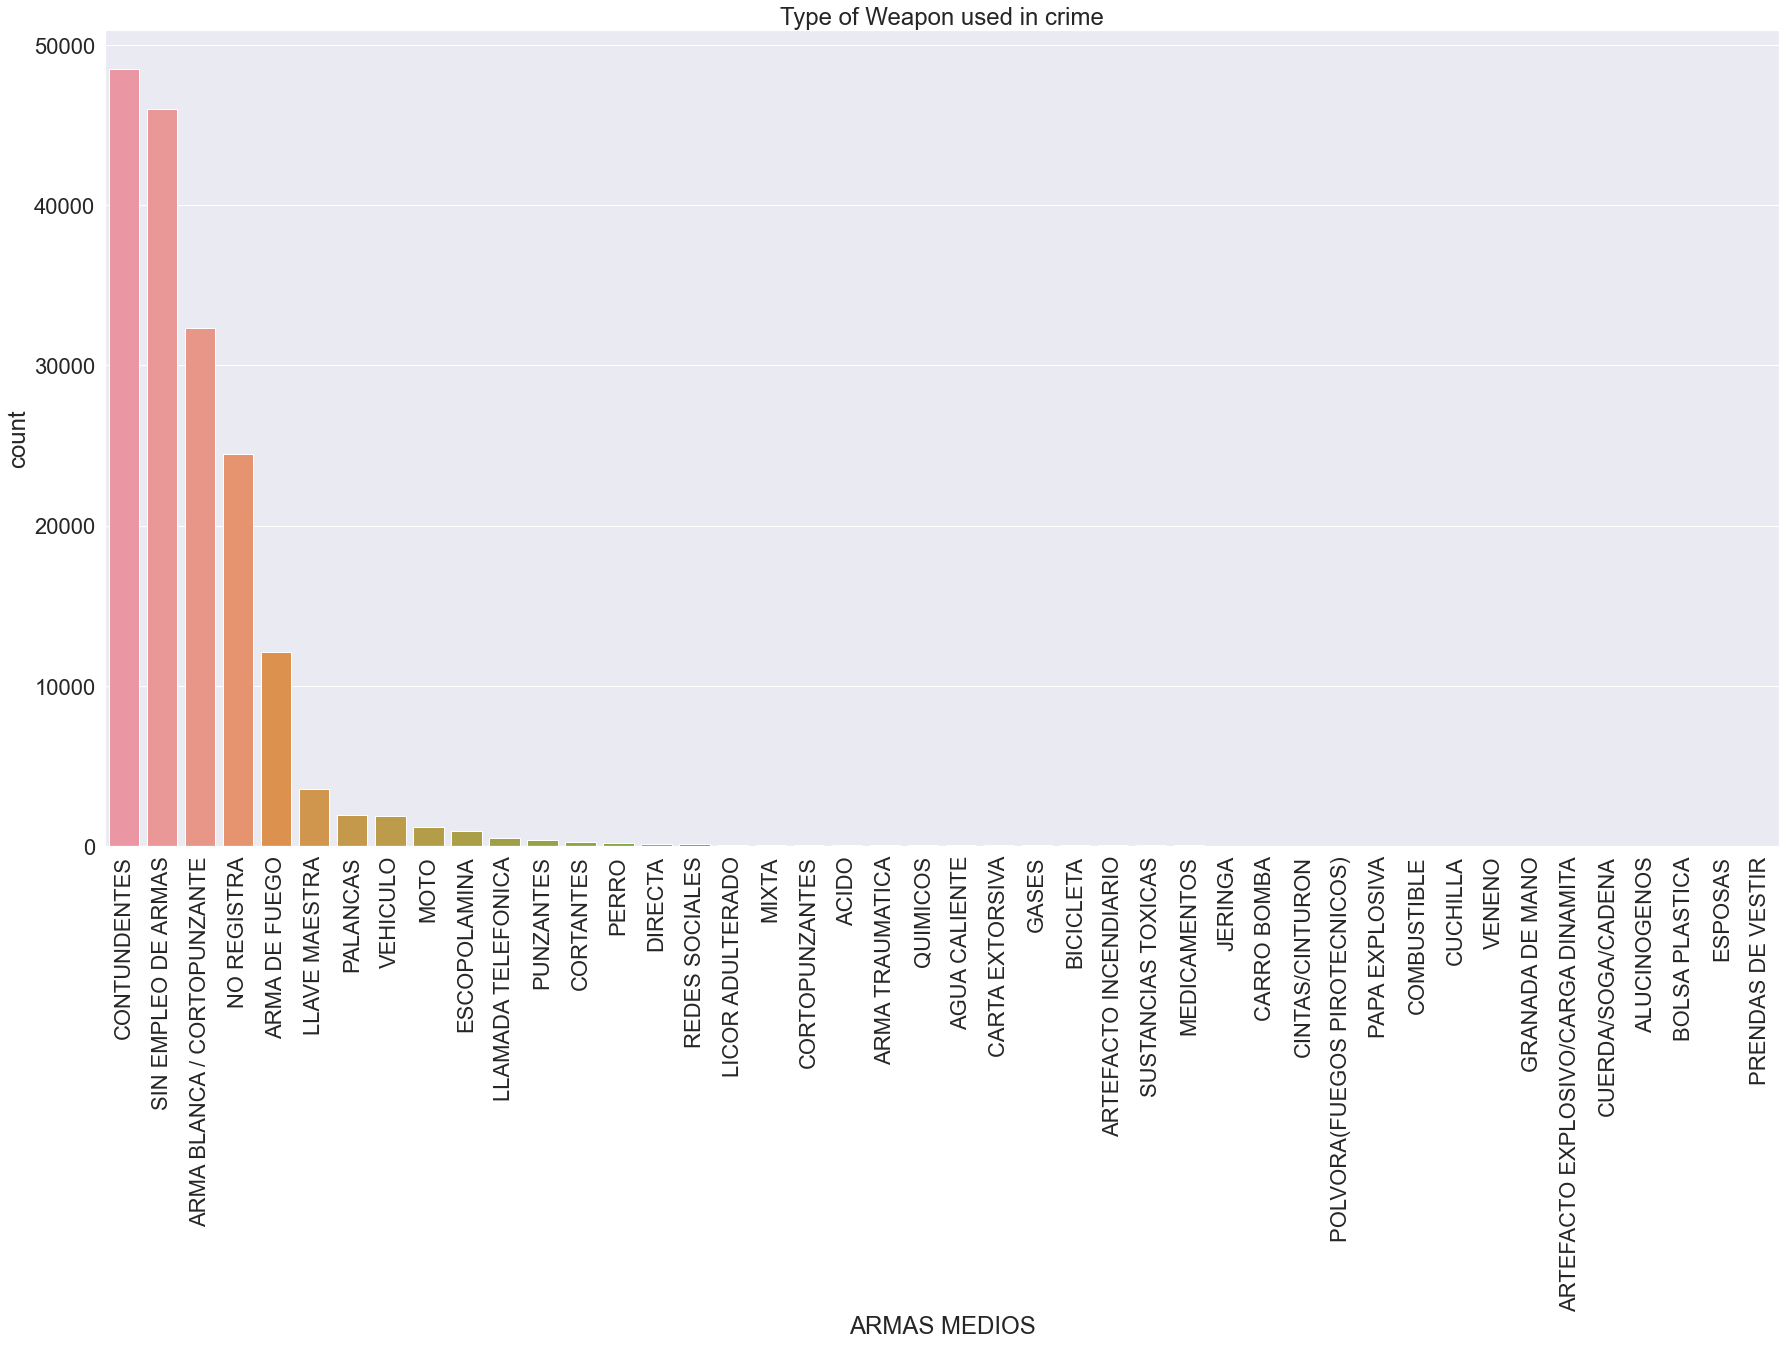

In [43]:
sns.set(font_scale =2)
fig, ax = plt.subplots(figsize=(30,15))
ax = sns.countplot(x ="ARMAS MEDIOS", data = delitos_municipios_obj, order = delitos_municipios_obj["ARMAS MEDIOS"].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
ax.set(title="Type of Weapon used in crime")

From the graph of the type of weapons used in the crime, blunt weapons stand out in the first place, followed by crimes without the use of weapons, white weapons, not registered and firearms. It would be important to review the national police within the category of forceful weapons that includes, because the difference between various categories is not evident.

[Text(0.5, 1.0, 'Type of Crime')]

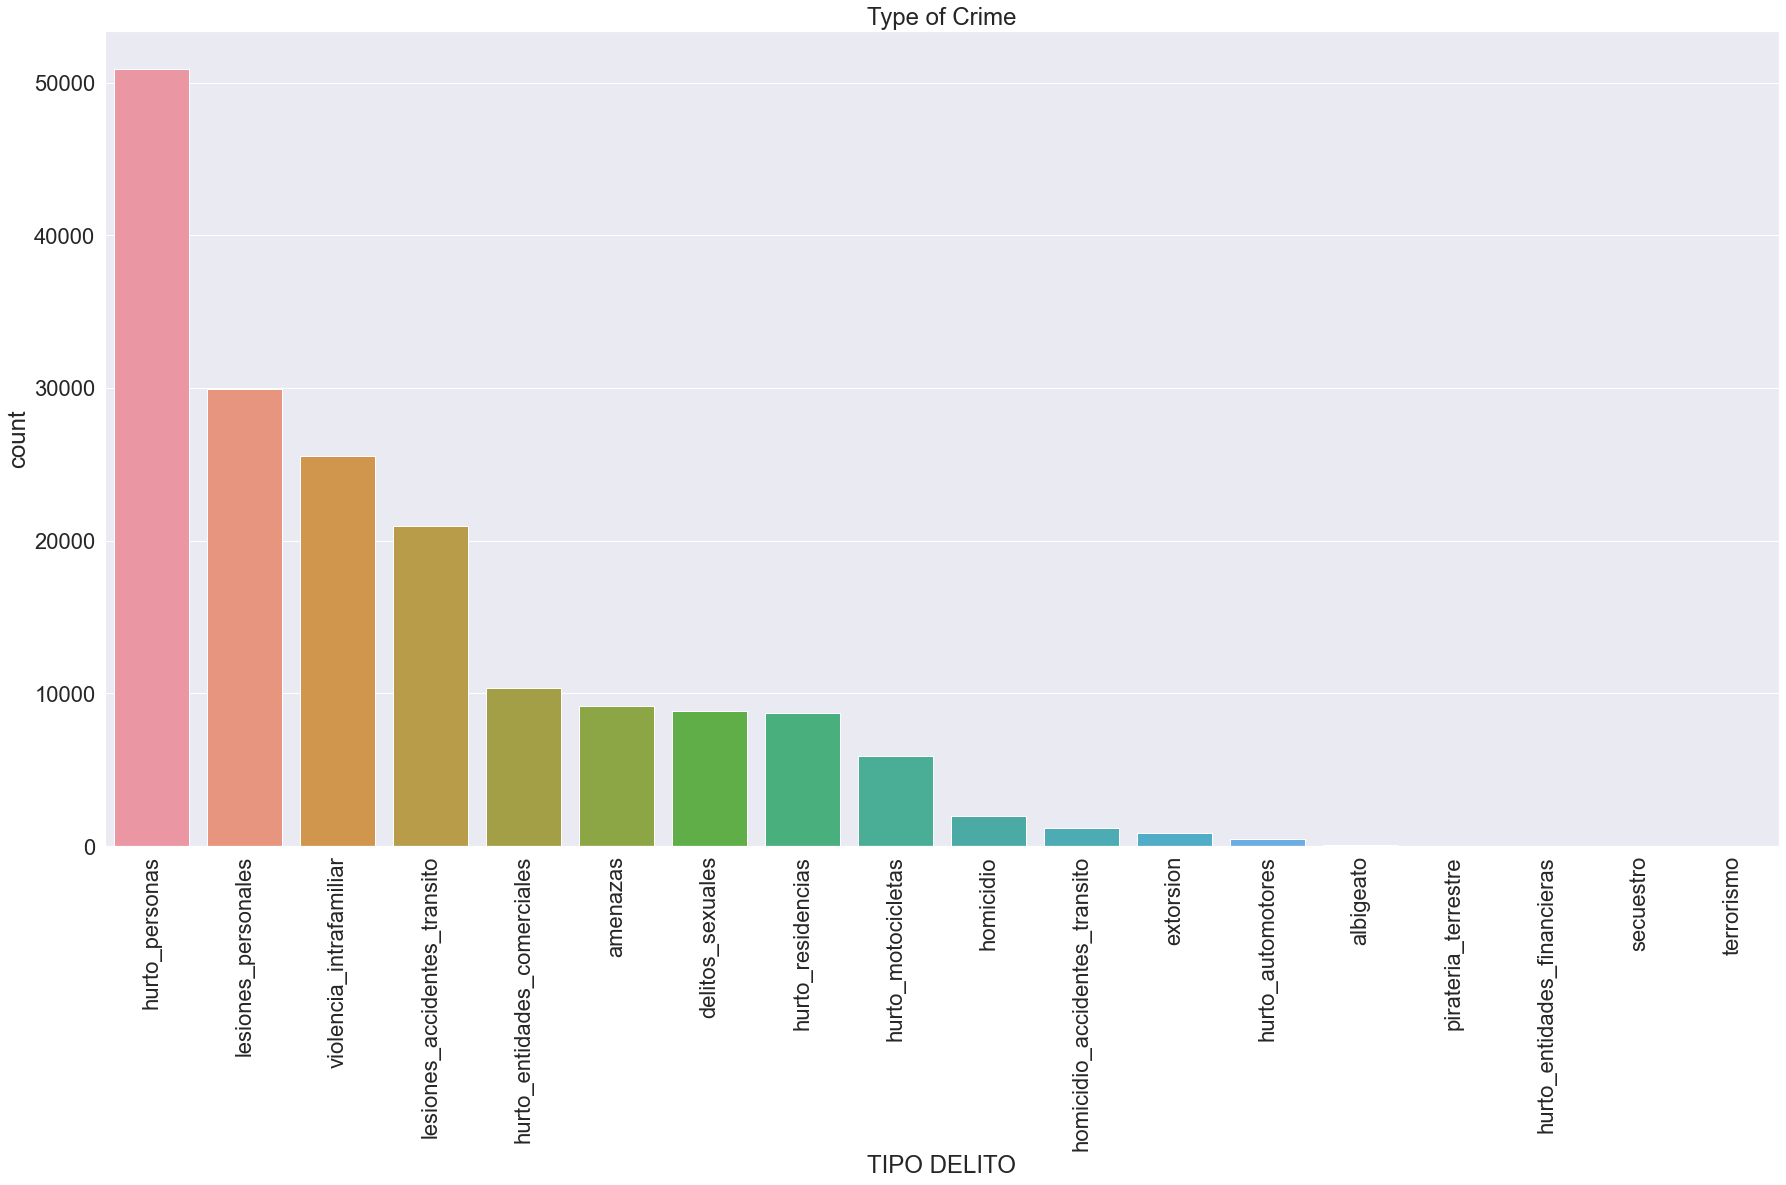

In [44]:
sns.set(font_scale =2)
fig, ax = plt.subplots(figsize=(30,15))
ax = sns.countplot(x ="TIPO DELITO", data = delitos_municipios_obj, order = delitos_municipios_obj["TIPO DELITO"].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
ax.set(title="Type of Crime")

When looking at crimes by type of crime, the result is that theft of persons is the type of crime that is most repeated. In addition, among the crimes that occur the most are personal injuries, domestic violence and injuries due to traffic accidents.

In [45]:
generate_df = delitos_municipios_obj.groupby(["AÑO HECHO","MES HECHO"]).size().to_frame("size").reset_index()

In [46]:
pivoted_df = pd.pivot_table(data=generate_df, index="MES HECHO", columns="AÑO HECHO", values="size")
pivoted_df

AÑO HECHO,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
MES HECHO,,,,,,,,,,,,,
1.0,924.0,910.0,1105.0,1130.0,914.0,1055.0,1074.0,1220.0,1304.0,1862.0,2098.0,1125.0,919.0
2.0,676.0,842.0,1086.0,1063.0,859.0,1120.0,1107.0,1188.0,1341.0,1834.0,1761.0,1260.0,NaN
3.0,800.0,945.0,1092.0,1160.0,1196.0,1174.0,1117.0,1195.0,1333.0,2227.0,1210.0,1398.0,NaN
4.0,867.0,878.0,1045.0,1119.0,998.0,974.0,1141.0,1135.0,1323.0,1870.0,727.0,1232.0,NaN
5.0,841.0,893.0,1182.0,1115.0,1002.0,1118.0,1073.0,1305.0,1478.0,2079.0,1274.0,1291.0,NaN
6.0,841.0,934.0,1025.0,1084.0,895.0,1086.0,1086.0,1095.0,1305.0,1981.0,1453.0,1219.0,NaN
7.0,852.0,973.0,1081.0,1198.0,1049.0,1143.0,1054.0,1162.0,1349.0,2074.0,1650.0,1299.0,NaN
8.0,927.0,997.0,1119.0,1171.0,1143.0,1101.0,1113.0,1237.0,1393.0,2001.0,1617.0,1389.0,NaN
9.0,931.0,988.0,1155.0,1245.0,1162.0,1000.0,1065.0,1237.0,1356.0,2080.0,1692.0,1375.0,NaN


<AxesSubplot:xlabel='AÑO HECHO', ylabel='MES HECHO'>

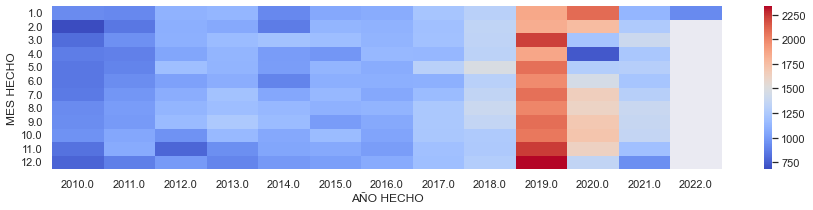

In [47]:
sns.set(font_scale =1)
plt.figure(figsize=(15, 3))
sns.heatmap(pivoted_df, cmap="coolwarm")

Finally, to see through a heat map the crimes per month, what was seen in the line graph above stands out, that the year 2019 was the year with the highest crime rate. On the other hand, the graph allows us to see that normally during the months of July to November there are the highest number of crimes in the municipalities that we are taking for the investigation.

In [48]:
pd.crosstab(index=delitos_municipios_obj["MUNICIPIO"], columns=delitos_municipios_obj["TIPO DELITO"], margins=True)

TIPO DELITO,albigeato,amenazas,delitos_sexuales,extorsion,homicidio,homicidio_accidentes_transito,hurto_automotores,hurto_entidades_comerciales,hurto_entidades_financieras,hurto_motocicletas,hurto_personas,hurto_residencias,lesiones_accidentes_transito,lesiones_personales,pirateria_terrestre,secuestro,terrorismo,violencia_intrafamiliar,All
MUNICIPIO,,,,,,,,,,,,,,,,,,,
BUCARAMANGA (CT),12,5440,4595,589,1182,630,200,6417,16,3320,28632,4379,12004,14263,8,6,11,11689,93393
FLORIDABLANCA,8,1530,1839,140,319,144,88,1838,2,1360,10528,1818,3687,6037,2,1,0,5528,34869
GIRÓN,22,1411,1257,90,233,219,97,1048,1,603,6282,1178,2306,5231,4,4,0,5050,25036
PIEDECUESTA,13,789,1136,67,219,194,55,1050,2,584,5413,1366,2976,4388,12,2,0,3247,21513
All,55,9170,8827,886,1953,1187,440,10353,21,5867,50855,8741,20973,29919,26,13,11,25514,174811


Finally, we can see through the previous cross table that in the 4 research municipalities, the type of crime that occurs the most is theft from people.